# Proyecto I- Parte IV (Core)

## Análisis y Predicción de Ventas en una Tienda de Retail

### Parte IV: Análisis Exploratorio de Datos (EDA) y Visualización

En esta cuarta parte del proyecto, aplicaremos técnicas avanzadas de análisis exploratorio de datos (EDA) y visualización para comprender mejor el conjunto de datos de ventas de la tienda de retail. Utilizaremos Python, Pandas y Matplotlib para explorar y visualizar los datos, identificar patrones y tendencias, y preparar los datos para un análisis más profundo.

## Instrucciones

### Continuar desde la Parte III
* Asegúrate de tener el repositorio de GitHub clonado localmente y el dataset ya limpiado y preparado desde la Parte III.
### Análisis Descriptivo y Visualización
* Calcula estadísticas descriptivas básicas para comprender mejor las características de los datos.
* Utiliza histogramas y boxplots para visualizar la distribución de las variables numéricas clave.
* Crea gráficos de líneas para mostrar las tendencias de ventas a lo largo del tiempo.
* Utiliza gráficos de dispersión para analizar la relación entre diferentes variables.
* Combina histogramas y boxplots para visualizar la distribución de las ventas y detectar valores atípicos.
### Generar un Pull Request en GitHub
* Después de completar el análisis y las visualizaciones, sube los cambios a una nueva rama en tu repositorio de GitHub y genera un Pull Request (PR) para revisión.

### Librerias y Dataset

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib.gridspec as gridspec

In [31]:
path = '../data/retail_sales_dataset.csv'
df = pd.read_csv(path, delimiter=',', header=0)
df.head()


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


### Calcula estadisticas descriptivas

In [32]:
columnas_numericas = df.select_dtypes(include=['float64', 'int64']).columns #creamos una variable con las columnas numéricas

In [33]:
# Vamos a usar una funcion para calcular las estadisticas descriptivas de la variable con las columnas numéricas.
def calcular_estadisticas(column, df):
    """
    Calcula estadísticas descriptivas para una columna numérica,
    omitiendo los valores nulos.

    Parámetros:
    - column (str): Nombre de la columna.
    - data (pd.Series): Serie de pandas con los datos de la columna.

    Retorna:
    - dict: Diccionario con las estadísticas calculadas.
    """
    estadisticas = {
        'Cuenta': int(np.sum(~np.isnan(df))),
        'Media': np.nanmean(df),
        'Mediana': np.nanmedian(df),
        'Desviación Estándar': np.nanstd(df, ddof=1),
        'Mínimo': np.nanmin(df),
        'Máximo': np.nanmax(df),
        '25% Percentil': np.nanpercentile(df, 25),
        '75% Percentil': np.nanpercentile(df, 75)
    }
    return estadisticas

# Crear un diccionario para almacenar las estadísticas
estadisticas_dict = {}
# Iterar sobre cada columna numérica y calcular las estadísticas
for columna in columnas_numericas:
    datos_columna = df[columna].values
    estadisticas = calcular_estadisticas(columna, datos_columna)
    estadisticas_dict[columna] = estadisticas
# Convertir el diccionario a un DataFrame para una mejor visualización
estadisticas_df = pd.DataFrame(estadisticas_dict).T  # Transponer para que las columnas sean las filas
estadisticas_df = estadisticas_df[['Cuenta', 'Media', 'Mediana', 'Desviación Estándar', 
                                   'Mínimo', 'Máximo', '25% Percentil', '75% Percentil']]
# Redondear las estadísticas a 2 decimales
estadisticas_df = estadisticas_df.round(2)
# Mostrar el DataFrame formateado
print("\nEstadísticas Descriptivas (Redondeadas a 2 decimales):")
estadisticas_df


Estadísticas Descriptivas (Redondeadas a 2 decimales):


,Cuenta,Media,Mediana,Desviación Estándar,Mínimo,Máximo,25% Percentil,75% Percentil
Transaction ID,1000.0,500.50,500.5,288.82,1.0,1000.0,250.75,750.25
Age,1000.0,41.39,42.0,13.68,18.0,64.0,29.00,53.00
Quantity,1000.0,2.51,3.0,1.13,1.0,4.0,1.00,4.00
Price per Unit,1000.0,179.89,50.0,189.68,25.0,500.0,30.00,300.00
Total Amount,1000.0,456.00,135.0,560.00,25.0,2000.0,60.00,900.00


### Utiliza Histogramas y Boxplots

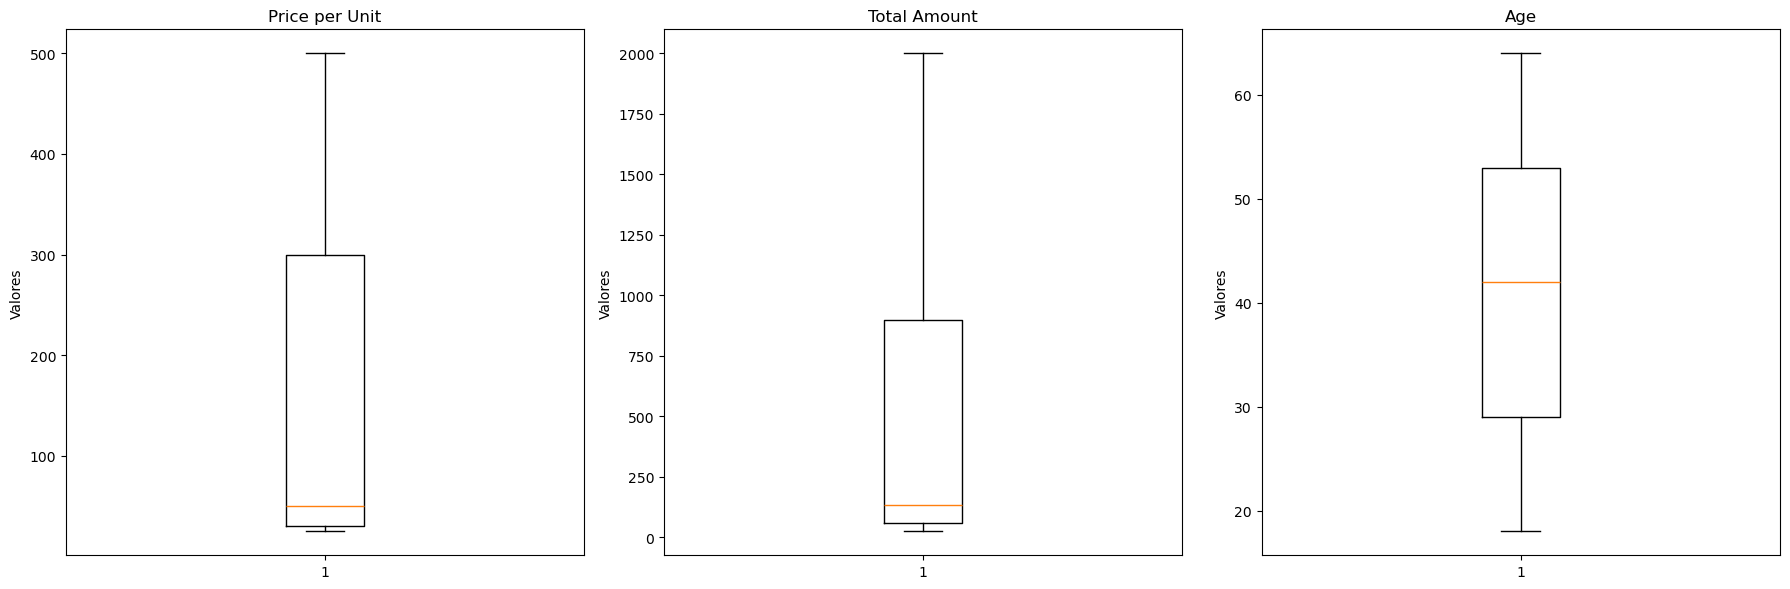

In [34]:
columns = ['Price per Unit', 'Total Amount', 'Age'] # Seleccionar las columnas que quieres graficar

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6)) # Crear una figura con subplots

# Iterar sobre las columnas y los ejes para crear los boxplots
for ax, column in zip(axes, columns):
    ax.boxplot(df[column].dropna())
    ax.set_title(column)
    ax.set_ylabel('Valores')

plt.tight_layout()
plt.show()


In [35]:
# Este code es para crear el boxplot en la libreria plotly
fig = px.box(df, x='Age', y='Total Amount', title='Boxplot de Salarios por Nivel de Experiencia')
fig.show()

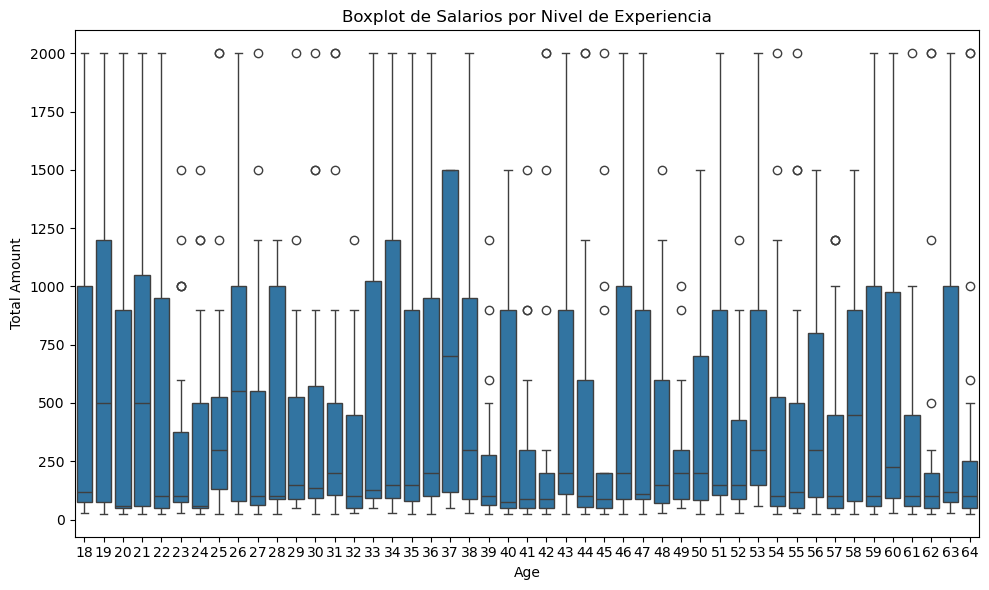

In [36]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age', y='Total Amount', data=df)
plt.title('Boxplot de Salarios por Nivel de Experiencia')
plt.tight_layout()
plt.show()

C:\Users\guill\AppData\Local\Temp\ipykernel_5712\3362038041.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




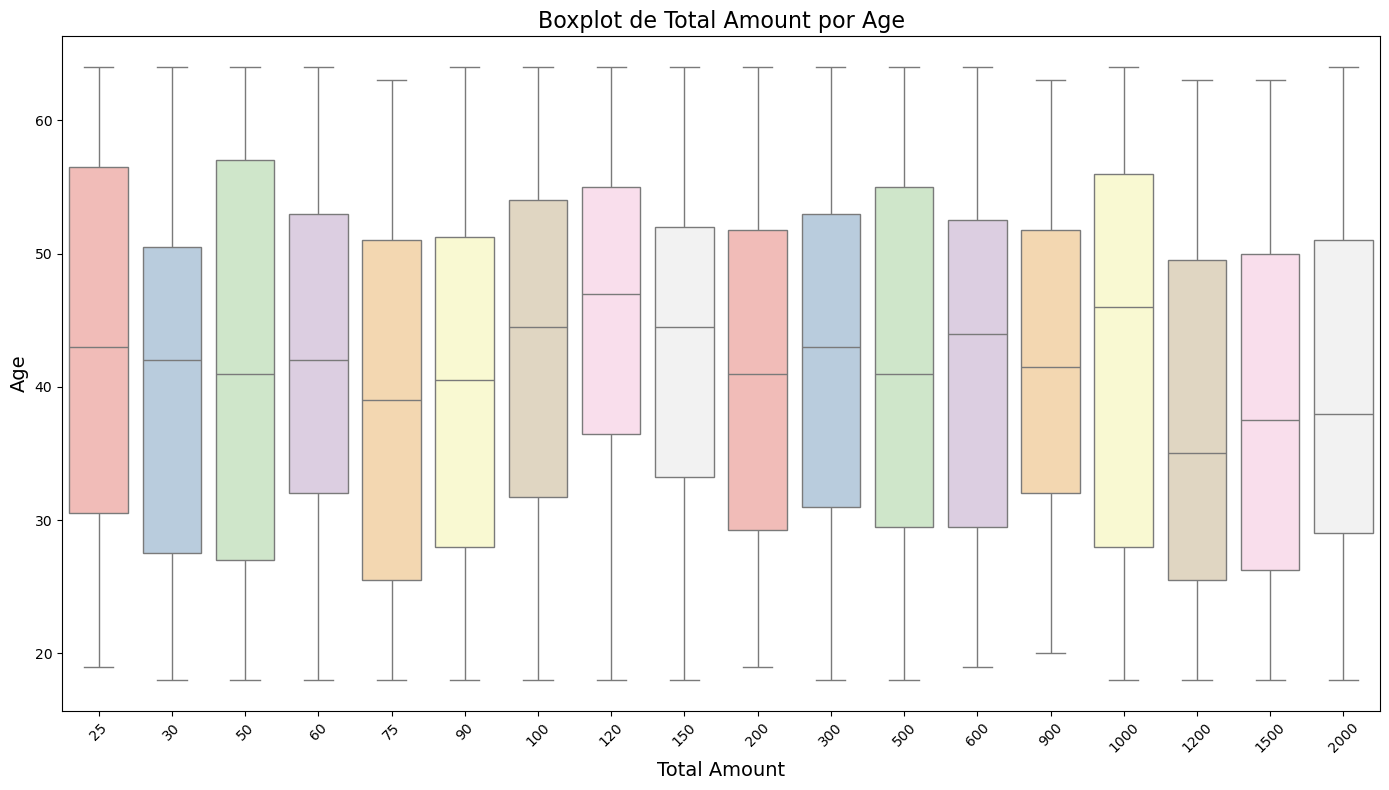

In [37]:
# Filtrar filas sin valores nulos en las columnas relevantes
df_box_numerics = df[['Age', 'Quantity', 'Price per Unit', 'Total Amount']].dropna()
# Configurar el tamaño del gráfico
plt.figure(figsize=(14, 8))
# Crear el boxplot usando seaborn
sns.boxplot(x='Total Amount', y='Age', data=df_box_numerics, palette='Pastel1')


plt.title('Boxplot de Total Amount por Age', fontsize=16)
plt.xlabel('Total Amount', fontsize=14)
plt.ylabel('Age', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

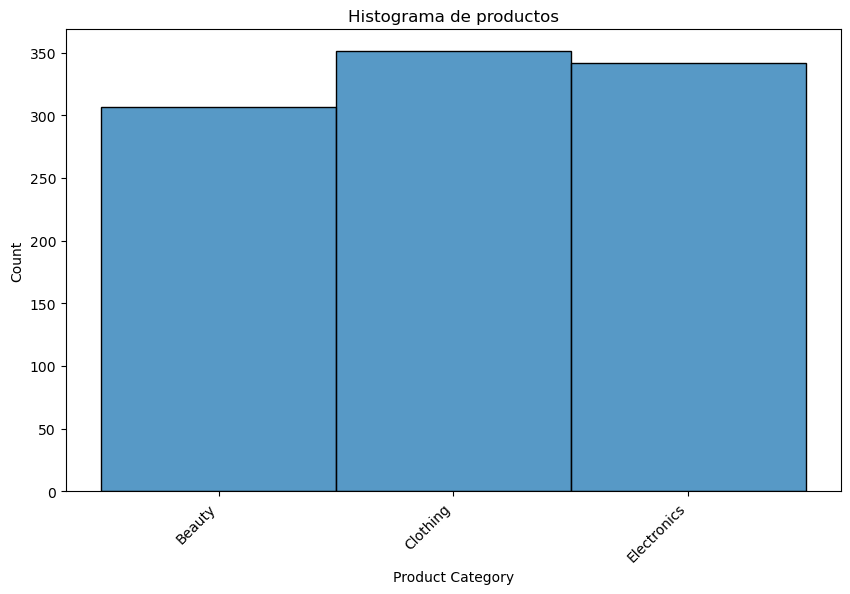

In [38]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Product Category')
plt.title('Histograma de productos')
plt.xticks(rotation=45, ha='right')
plt.show()

In [39]:
# Este codigo ejecuta un histograma en la libreria Plotly.
fig = px.histogram(df, x='Product Category', nbins=10, title='Histograma de productos')
fig.show()

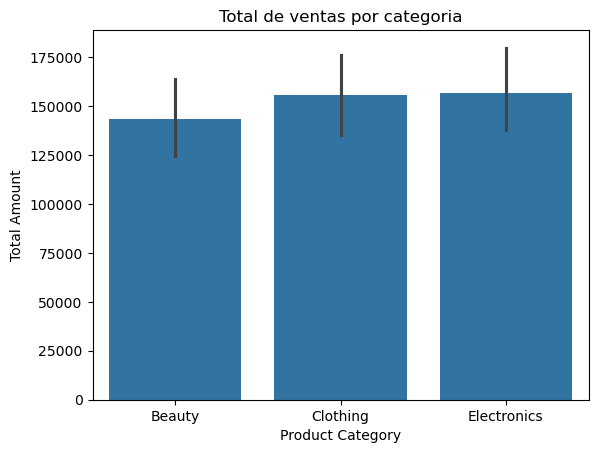

In [40]:
sns.barplot(data=df, x='Product Category', y='Total Amount', estimator=np.sum)
plt.title('Total de ventas por categoria')
plt.show()

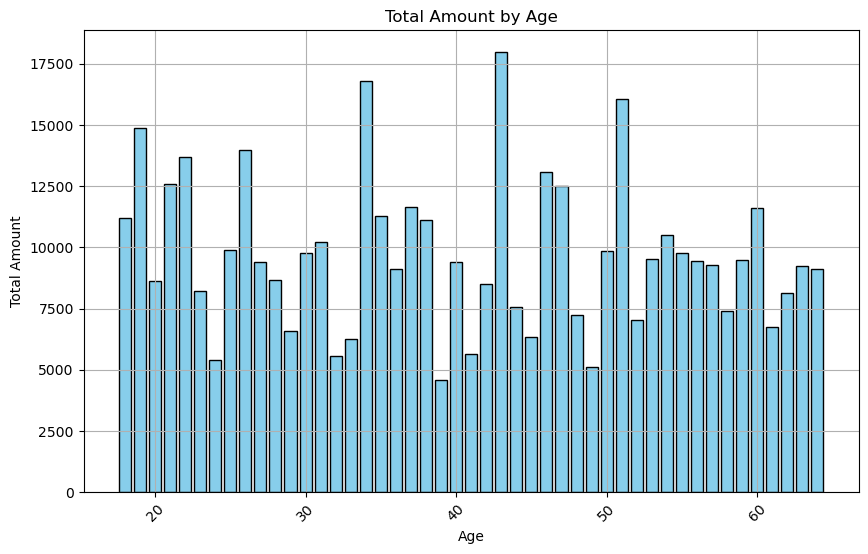

In [41]:
grouped1 = df.groupby('Age')['Total Amount'].sum().reset_index()# Agrupamos Age y Total Amount

plt.figure(figsize=(10,6))
plt.bar(grouped1['Age'], grouped1['Total Amount'], color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Total Amount')
plt.title('Total Amount by Age')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

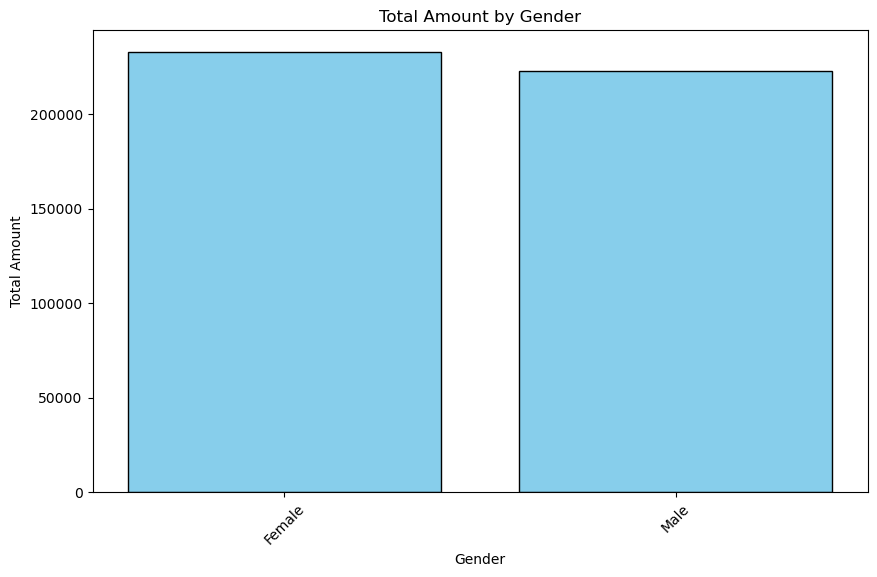

In [42]:
grouped2 = df.groupby('Gender')['Total Amount'].sum().reset_index() #Agrupamos por genero

plt.figure(figsize=(10,6))
plt.bar(grouped2['Gender'], grouped2['Total Amount'], color='skyblue', edgecolor='black')
plt.xlabel('Gender')
plt.ylabel('Total Amount')
plt.title('Total Amount by Gender')
plt.xticks(rotation=45)
plt.show()

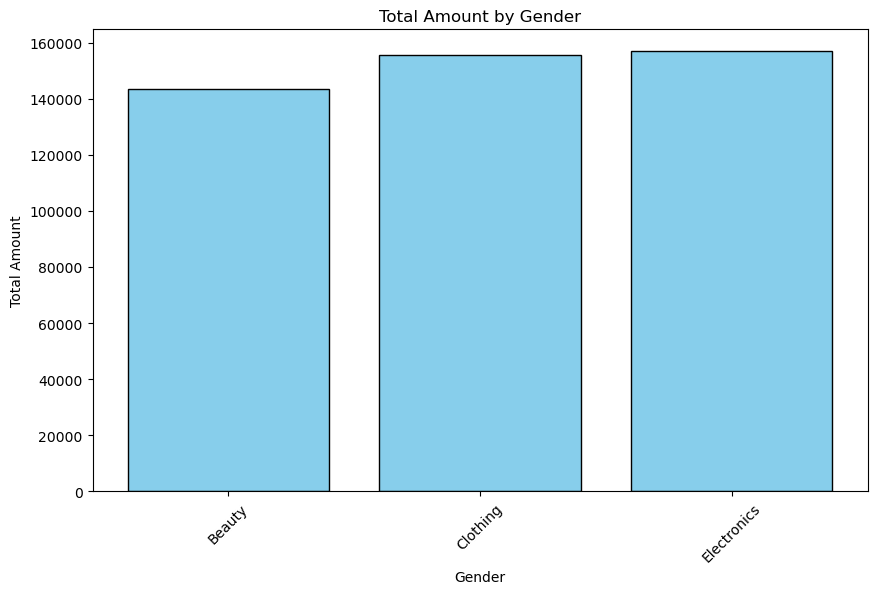

In [43]:
grouped3 = df.groupby('Product Category')['Total Amount'].sum().reset_index() 

plt.figure(figsize=(10,6))
plt.bar(grouped3['Product Category'], grouped3['Total Amount'], color='skyblue', edgecolor='black')
plt.xlabel('Gender')
plt.ylabel('Total Amount')
plt.title('Total Amount by Gender')
plt.xticks(rotation=45)
plt.show()

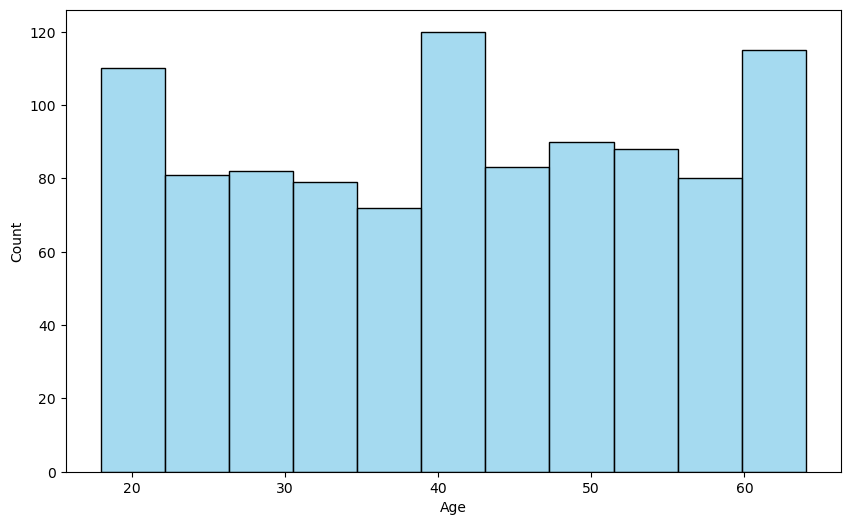

In [44]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], color='skyblue', edgecolor='black')
plt.show()


### **Crea gráficos de líneas**

In [45]:
df['Date'] = pd.to_datetime(df['Date']) #Convertimos la columna Date a su dtype correspondiente

C:\Users\guill\AppData\Local\Temp\ipykernel_5712\1710138631.py:3: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



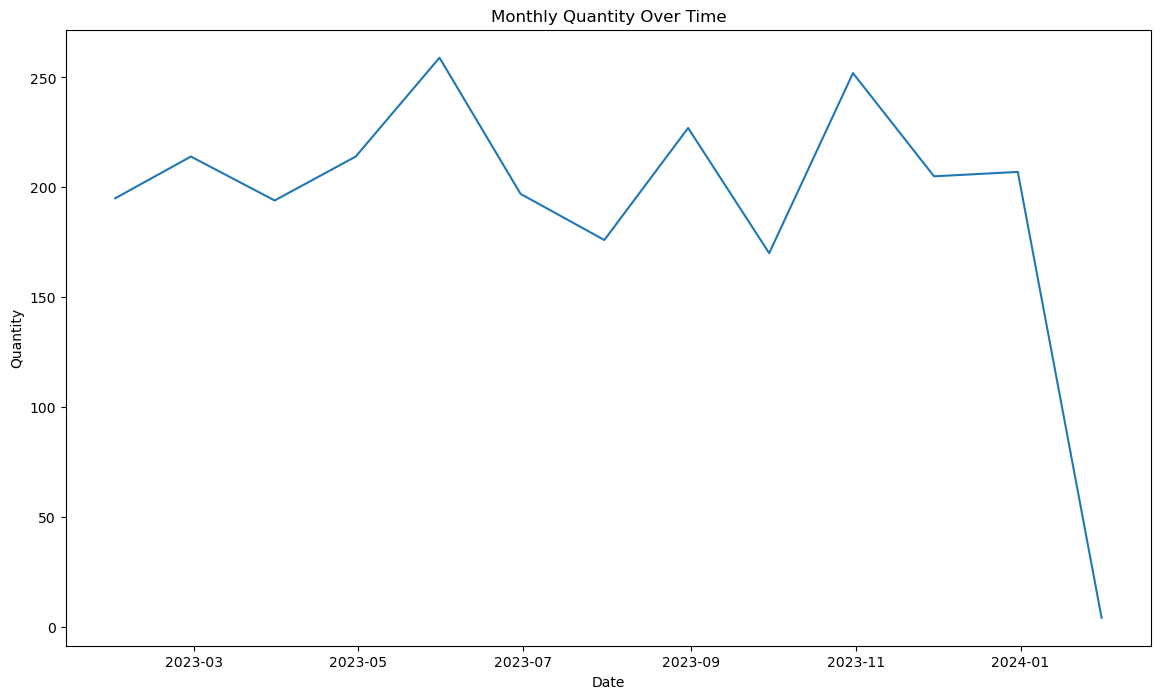

In [46]:
# Resamplear los datos a una frecuencia mensual y sumar los valores
df.set_index('Date', inplace=True)
df_resampled = df.resample('M').sum()

plt.figure(figsize=(14, 8))
sns.lineplot(data=df_resampled, x='Date', y='Quantity')
plt.title('Monthly Quantity Over Time')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.show()


### **Utiliza gráficos de dispersión**

Obeservacion: No tiene sentido hacer algun grafico de dispercion en este dataset porque no existen suficientes variables que puedan estar correlacionadas

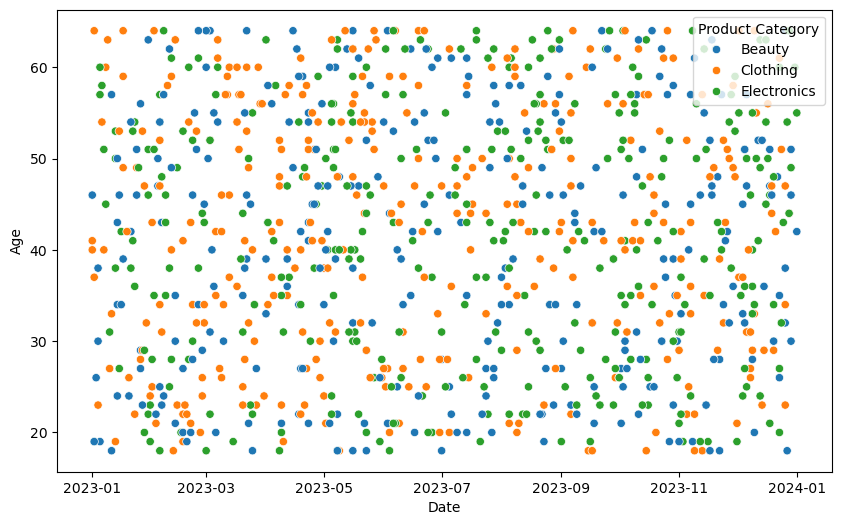

In [47]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Date', y='Age', hue='Product Category')
plt.show()

### **Combina histogramas y boxplots**

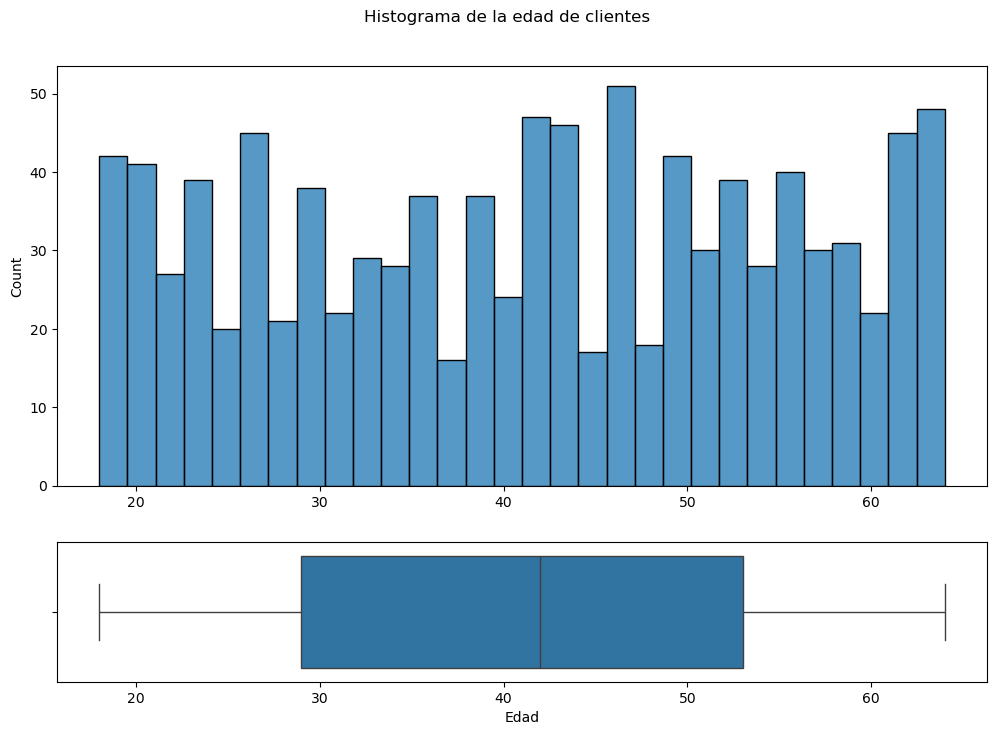

In [48]:
# Create figure and gridspec
fig = plt.figure(figsize=(12, 8))
gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1])

# Create the histogram
ax0 = plt.subplot(gs[0])
sns.histplot(data=df, x='Age', bins=30, ax=ax0)
ax0.set_xlabel('')  # Remove x label from histogram

# Create the boxplot
ax1 = plt.subplot(gs[1])
sns.boxplot(x=df['Age'], ax=ax1)
ax1.set_xlabel('Edad')  # Add label to boxplot

# Set the title for the entire figure
fig.suptitle('Histograma de la edad de clientes', y=0.95)
plt.show()

In [51]:
#Este code ejecuta un histograma en la libreria Plotly.
fig = px.histogram(df, x='Age', nbins=30, title='Histograma de la edad de clientes', labels={'Age': 'Edad'}, marginal='box')
fig.show()

### **Subplots para agrupar algunos graficos**

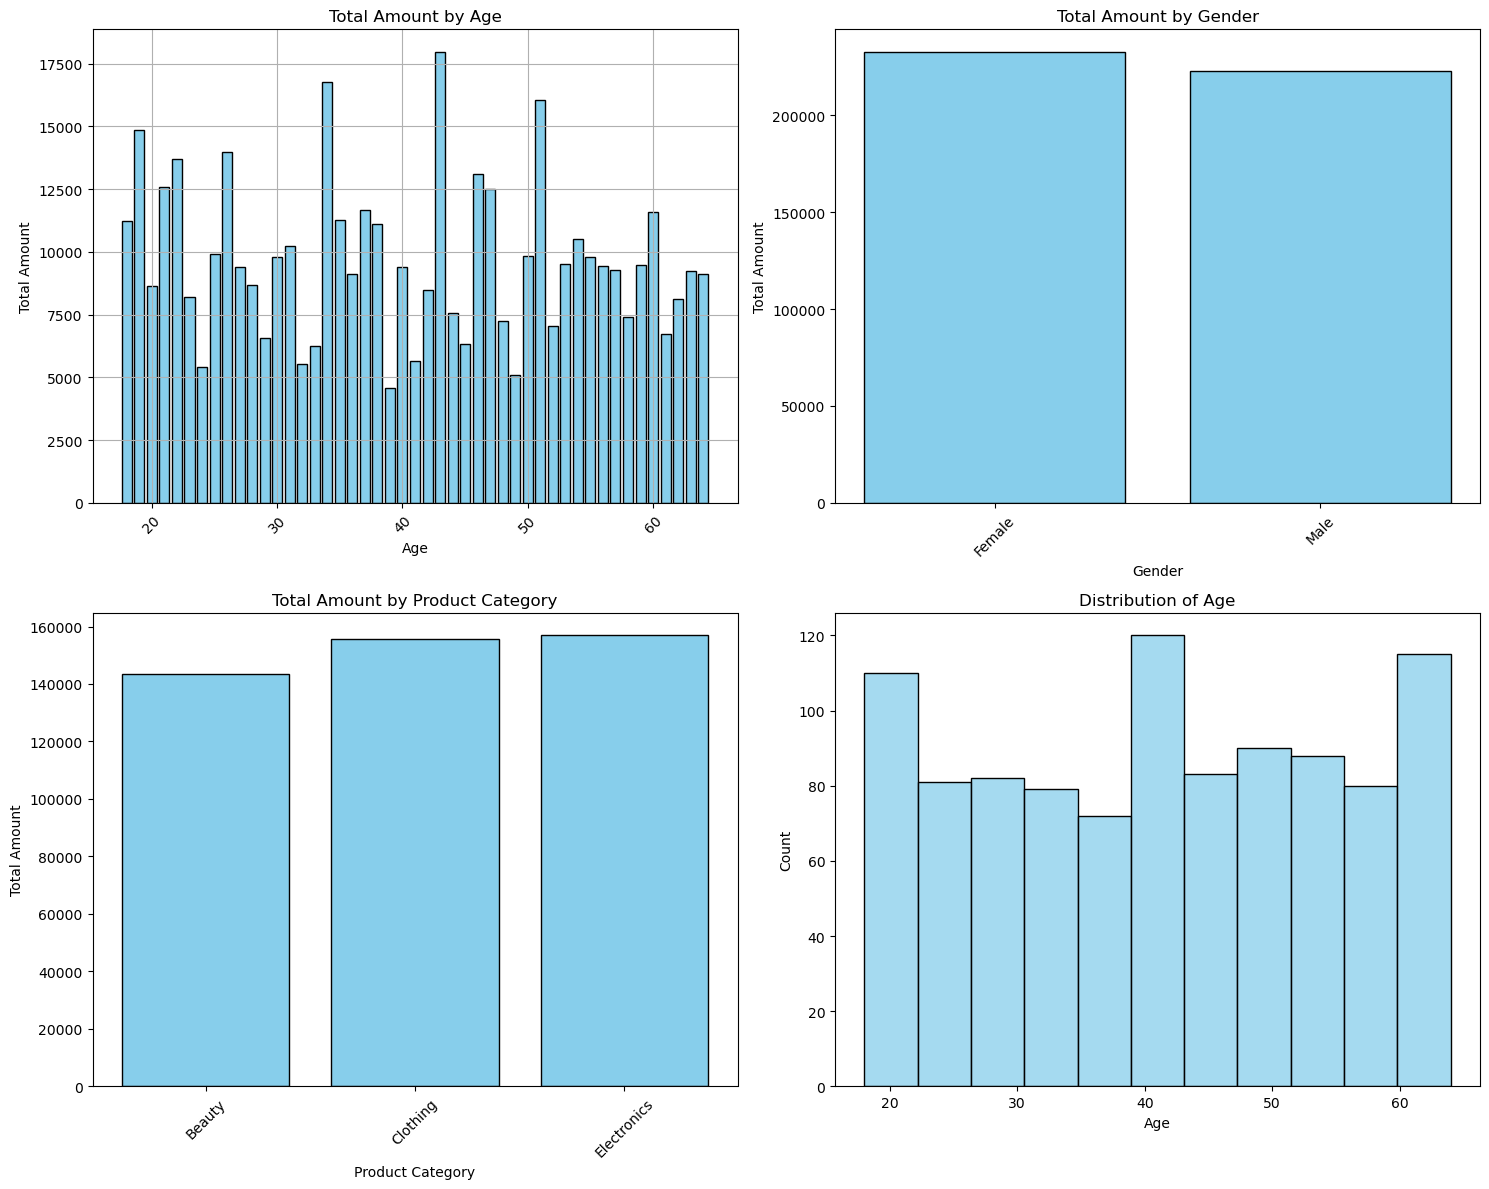

In [50]:
# Crear la figura y los ejes para los subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))  # 2 filas, 2 columnas

# Gráfico 1: Total Amount by Age
axes[0, 0].bar(grouped1['Age'], grouped1['Total Amount'], color='skyblue', edgecolor='black')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Total Amount')
axes[0, 0].set_title('Total Amount by Age')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(True)

# Gráfico 2: Total Amount by Gender
axes[0, 1].bar(grouped2['Gender'], grouped2['Total Amount'], color='skyblue', edgecolor='black')
axes[0, 1].set_xlabel('Gender')
axes[0, 1].set_ylabel('Total Amount')
axes[0, 1].set_title('Total Amount by Gender')
axes[0, 1].tick_params(axis='x', rotation=45)

# Gráfico 3: Total Amount by Product Category
axes[1, 0].bar(grouped3['Product Category'], grouped3['Total Amount'], color='skyblue', edgecolor='black')
axes[1, 0].set_xlabel('Product Category')
axes[1, 0].set_ylabel('Total Amount')
axes[1, 0].set_title('Total Amount by Product Category')
axes[1, 0].tick_params(axis='x', rotation=45)

# Gráfico 4: Histograma de Age
sns.histplot(df['Age'], color='skyblue', edgecolor='black', ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Age')

# Ajustar el espaciado entre los gráficos
plt.tight_layout()
plt.show()